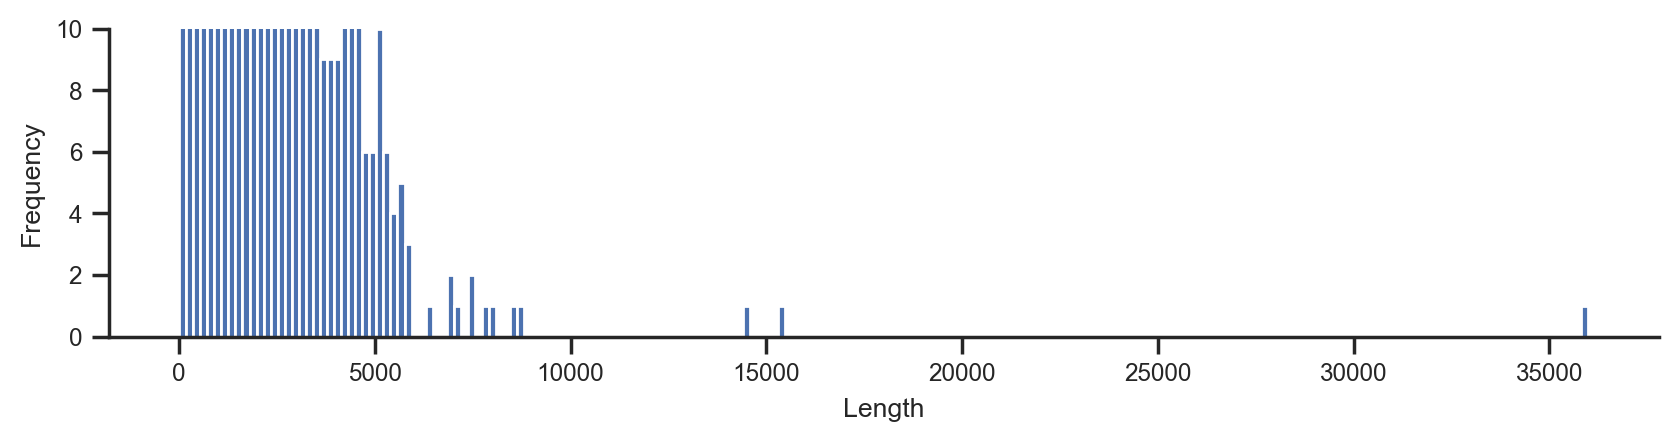

(23539, 4)


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import gget

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", font_scale=0.8, rc=custom_params)
%config InlineBackend.figure_format='retina'

df_list = []
for start_idx in range(0, 24000, 1000):
    df_list.append(pd.read_csv(f"./data/aa_seqs_human_{start_idx:05d}-{start_idx+1000:05d}.csv"))
df_prot = pd.concat(df_list)
df_prot["sequence_length"] = df_prot["sequence_length"].astype(float)
df_prot.rename(columns={"sequence_length": "aa_seq_length"}, inplace=True)

f, ax = plt.subplots(figsize=(10, 2))
ax.hist(df_prot["aa_seq_length"], bins=200)
ax.set(xlabel="Length", ylabel="Frequency", ylim=(0, 10))
plt.show()

print(df_prot.shape)


In [2]:
df_prot["aa_seq_length"].astype(float).describe().round(2)

count    23539.00
mean       547.91
std        601.11
min          2.00
25%        248.00
50%        405.00
75%        655.00
max      35991.00
Name: aa_seq_length, dtype: float64

In [3]:
df_nuc = pd.read_csv("./data/nuc_seqs_human.csv")
df_nuc["nuc_seq_length"] = df_nuc["nuc_seq"].apply(len)
df_nuc["ensemble_id"] = df_nuc["id"].str.split(".").str[0]

df_prot_nuc = pd.merge(df_prot, df_nuc, on="ensemble_id", how="left")
df_prot_nuc["nuc_aa_seq_ratio"] = df_prot_nuc["nuc_seq_length"]/df_prot_nuc["aa_seq_length"]
display(df_prot_nuc.head(3))

,ensemble_id,gene_name,aa_seq_length,aa_seq,id,gene,gene_symbol,chromosome,start,end,strand,nuc_seq,ens_gene_id,nuc_seq_length,nuc_aa_seq_ratio
0,ENST00000390473,TRDJ1,16.0,TDKLIFGKGTRVTVEP,ENST00000390473.1,ENSG00000211825.1,TRDJ1,GRCh38:14,22450089.0,22450139.0,1.0,ACACCGATAAACTCATCTTTGGAAAAGGAACCCGTGTGACTGTGGA...,ENSG00000211825,51,3.187500
1,ENST00000390484,TRAJ54,20.0,XIQGAQKLVFGQGTRLTINP,ENST00000390484.1,ENSG00000211836.1,TRAJ54,GRCh38:14,22482287.0,22482346.0,1.0,TAATTCAGGGAGCCCAGAAGCTGGTATTTGGCCAAGGAACCAGGCT...,ENSG00000211836,60,3.000000
2,ENST00000390488,TRAJ49,19.0,XNTGNQFYFGTGTSLTVIP,ENST00000390488.1,ENSG00000211840.1,TRAJ49,GRCh38:14,22489488.0,22489543.0,1.0,GAACACCGGTAACCAGTTCTATTTTGGGACAGGGACAAGTTTGACG...,ENSG00000211840,56,2.947368


In [4]:
# show rows where gene_name is not same as gene_symbol
df_temp = df_prot_nuc[df_prot_nuc["gene_name"] != df_prot_nuc["gene_symbol"]].reset_index(drop=True)
display(df_temp)
print(df_temp.shape)

# example of one of these ids that do not contain a gene name (either nan or missing)
gget.info("ENST00000566461")

,ensemble_id,gene_name,aa_seq_length,aa_seq,id,gene,gene_symbol,chromosome,start,end,strand,nuc_seq,ens_gene_id,nuc_seq_length,nuc_aa_seq_ratio
0,ENST00000631869,NaN,117.0,MEFGLSWVFLVALLRGVQCQVQLVESGGGVVQPGGSLRLSCAASGF...,ENST00000631869.1,ENSG00000282150.1,NaN,NaN,NaN,NaN,NaN,ATGGAGTTTGGGCTGAGCTGGGTTTTCCTCGTTGCTCTTTTAAGAG...,ENSG00000282150,353,3.017094
1,ENST00000632052,NaN,118.0,MAPHHGQDLELIFLVAAATGKVQLGQSEAEVKKPGASVKVSCKASG...,ENST00000632052.1,ENSG00000282822.1,NaN,NaN,NaN,NaN,NaN,ATGGCTCCTCACCATGGACAGGACCTAGAGCTAATCTTCCTGGTGG...,ENSG00000282822,356,3.016949
2,ENST00000633570,NaN,116.0,MKHLWFFLLLVAAPRWVLSQLQLQESGPGLVKPSQTLSLTCTVSGG...,ENST00000633570.1,ENSG00000278082.3,NaN,NaN,NaN,NaN,NaN,ATGAAACACCTGTGGTTCTTCCTCCTGCTGGTGGCAGCTCCCAGAT...,ENSG00000278082,349,3.008621
3,ENST00000626108,NaN,117.0,MDMRVPAQLLGLLLLWLPGTRCDIQMTQSPSSLSASVGDRVTITCR...,ENST00000626108.1,ENSG00000281759.1,NaN,NaN,NaN,NaN,NaN,ATGGACATGAGGGTCCCCGCTCAGCTCCTGGGGCTCCTGCTGCTCT...,ENSG00000281759,353,3.017094
4,ENST00000630556,IGHV1OR15-1,117.0,MDWTWRILFLVAAATGAHSQVQLVQSGAEVKKPGASVKVSCKASGY...,ENST00000630556.1,ENSG00000281179.1,NaN,GRCh38:15,21717808.0,21718245.0,-1.0,ATGGACTGGACCTGGAGGATCCTCTTCTTGGTGGCAGCAGCTACAG...,ENSG00000281179,353,3.017094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ENST00000648686,NaN,217.0,AEEDGRAQAAGSSVLRELHTADSVVNGSAQADVPKELEREESGAAE...,ENST00000648686.1,ENSG00000285839.1,NaN,GRCh38:1,52020153.0,52033350.0,-1.0,GCTGAGGAGGACGGGAGAGCCCAGGCGGCGGGCAGCAGCGTCCTCA...,ENSG00000285839,1986,9.152074
947,ENST00000566461,NaN,37.0,MATLYPFARLLIYVLAYSCVYSCLYMLVYFLRIFVED,ENST00000566461.2,ENSG00000293253.2,NaN,GRCh38:1,53413163.0,53440018.0,-1.0,GGAGATGACCATTCCCCTAAACCGGCATAGTTGGGTGAGGACTCCA...,ENSG00000293253,613,16.567568
948,ENST00000651827,NaN,108.0,FHFVSQCCQGKECSNTSDALDPPLKNVSSNAECPACYESNGTSCHG...,ENST00000651827.1,ENSG00000286015.1,NaN,GRCh38:1,248681249.0,248748349.0,-1.0,TTTCATTTTGTAAGCCAGTGCTGCCAAGGAAAGGAATGCAGCAACA...,ENSG00000286015,1449,13.416667
949,ENST00000417456,NaN,55.0,MALLLSVLRVLLGGFFALVGLAKLSEEISAPVSERMVRDEQQCWGP...,ENST00000417456.1,ENSG00000284773.1,NaN,GRCh38:1,34974356.0,34985313.0,-1.0,GCGCGGCCATGGCGCTCCTGCTTTCGGTGCTGCGTGTACTGCTGGG...,ENSG00000284773,3163,57.509091


(951, 15)


14:30:56 - WARNING - No reviewed UniProt results were found for ID ENST00000566461. Returning all unreviewed results.


,ensembl_id,uniprot_id,pdb_id,ncbi_gene_id,species,assembly_name,primary_gene_name,ensembl_gene_name,synonyms,parent_gene,...,transcript_names,transcript_strands,transcript_starts,transcript_ends,all_exons,exon_starts,exon_ends,all_translations,translation_starts,translation_ends
ENST00000566461,ENST00000566461.2,A0AAQ5BII1,NaN,NaN,homo_sapiens,GRCh38,NaN,NaN,[],ENSG00000293253,...,NaN,NaN,NaN,NaN,"[ENSE00004026905.1, ENSE00004026904.1, ENSE000...","[53439775, 53417528, 53415401, 53413163]","[53440018, 53417666, 53415524, 53413268]","[ENSE00004026905.1, ENSE00004026904.1, ENSE000...","[53439775, 53417528, 53415401, 53413163]","[53440018, 53417666, 53415524, 53413268]"


In [5]:
df_prot_nuc.isna().sum()

ensemble_id            0
gene_name            578
aa_seq_length          0
aa_seq                 0
id                     0
gene                   0
gene_symbol          737
chromosome          4175
start               4175
end                 4175
strand              4175
nuc_seq                0
ens_gene_id            0
nuc_seq_length         0
nuc_aa_seq_ratio       0
dtype: int64

In [6]:
df_prot_nuc.rename(columns={"ensemble_id": "enst_id", "gene": "ensg_id"}, inplace=True)
df_prot_nuc = df_prot_nuc[["gene_symbol", "ensg_id", "enst_id", "nuc_seq_length", "aa_seq_length", "nuc_aa_seq_ratio", 
                            "chromosome", "start", "end", "strand", "nuc_seq", "aa_seq"]]
display(df_prot_nuc.isna().sum().to_frame().T)

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
0,737,0,0,0,0,0,4175,4175,4175,4175,0,0


In [7]:
# remove nans in chromosome, retain nan gene_symbol
# Remaining entries have a well-defined location, aa-sequence and cdna sequence. 

df_prot_nuc = df_prot_nuc[~df_prot_nuc["chromosome"].isna()].reset_index(drop=True)
display(df_prot_nuc.head(3))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
0,TRDJ1,ENSG00000211825.1,ENST00000390473,51,16.0,3.187500,GRCh38:14,22450089.0,22450139.0,1.0,ACACCGATAAACTCATCTTTGGAAAAGGAACCCGTGTGACTGTGGA...,TDKLIFGKGTRVTVEP
1,TRAJ54,ENSG00000211836.1,ENST00000390484,60,20.0,3.000000,GRCh38:14,22482287.0,22482346.0,1.0,TAATTCAGGGAGCCCAGAAGCTGGTATTTGGCCAAGGAACCAGGCT...,XIQGAQKLVFGQGTRLTINP
2,TRAJ49,ENSG00000211840.1,ENST00000390488,56,19.0,2.947368,GRCh38:14,22489488.0,22489543.0,1.0,GAACACCGGTAACCAGTTCTATTTTGGGACAGGGACAAGTTTGACG...,XNTGNQFYFGTGTSLTVIP


In [8]:
# clean up: chromosome location being nan seem to be in cases that are 
df_prot_nuc = df_prot_nuc[~df_prot_nuc["chromosome"].isna()].reset_index(drop=True)
display(df_prot_nuc.head(3))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
0,TRDJ1,ENSG00000211825.1,ENST00000390473,51,16.0,3.187500,GRCh38:14,22450089.0,22450139.0,1.0,ACACCGATAAACTCATCTTTGGAAAAGGAACCCGTGTGACTGTGGA...,TDKLIFGKGTRVTVEP
1,TRAJ54,ENSG00000211836.1,ENST00000390484,60,20.0,3.000000,GRCh38:14,22482287.0,22482346.0,1.0,TAATTCAGGGAGCCCAGAAGCTGGTATTTGGCCAAGGAACCAGGCT...,XIQGAQKLVFGQGTRLTINP
2,TRAJ49,ENSG00000211840.1,ENST00000390488,56,19.0,2.947368,GRCh38:14,22489488.0,22489543.0,1.0,GAACACCGGTAACCAGTTCTATTTTGGGACAGGGACAAGTTTGACG...,XNTGNQFYFGTGTSLTVIP


🔎🕵🏽‍♂️ The ratio of nucleotide sequence to amino acid sequence is not exactly 3.0 for every gene in our table. 

 - The nucleotide sequence is based on `cdna` here. 
 - `cdna` is the spliced transcript so it excludes `introns`.
 - However, `exons` also contain non-coding regions, e.g. `UTRs`.
 - This explains rations >= 3.0.
 - Version mismatches in the `cdna` sequence vs. amino acid sequence explains ratios < 3.0.

🔎🕵🏽‍♂️ Some positions are missing; spot checks indicate these sometimes contain multiple location annotations, or the annotations are missing altogether. We can simply remove these for now. 

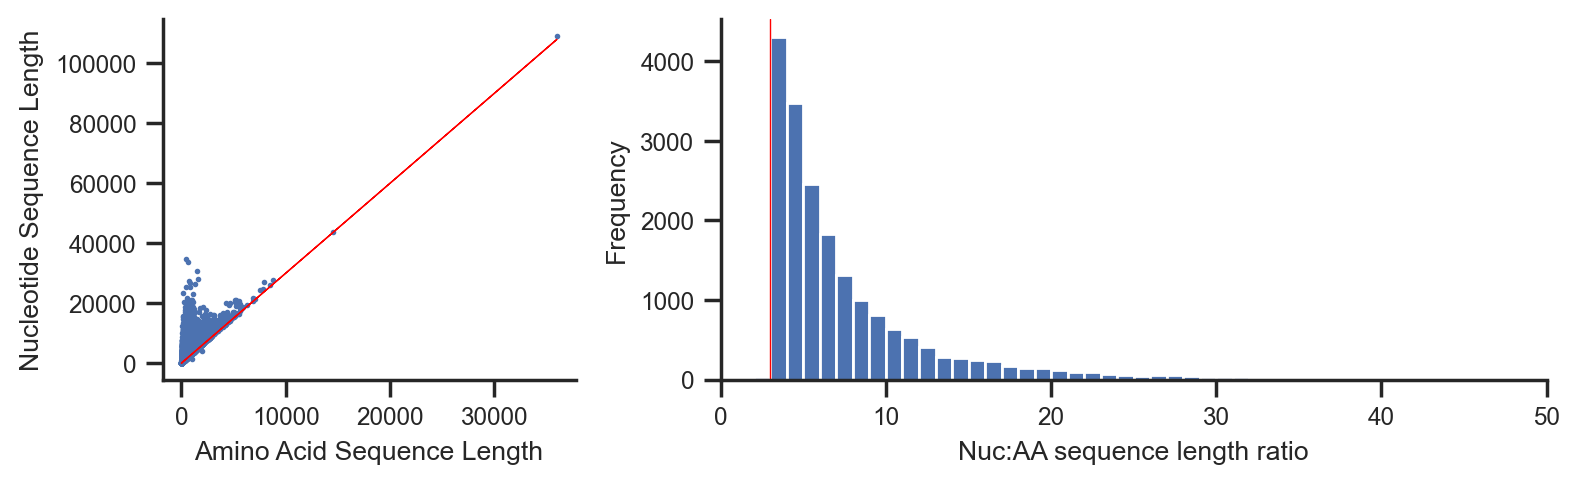

In [9]:
f, ax = plt.subplots(1, 2,figsize=(8, 2.5), gridspec_kw={'width_ratios': [1, 2]})
ax[0].scatter(df_prot_nuc["aa_seq_length"], df_prot_nuc["nuc_seq_length"], s=1)
ax[0].plot(df_prot_nuc["aa_seq_length"], 3*df_prot_nuc["aa_seq_length"], linewidth=.5, color="red")
ax[0].set(xlabel="Amino Acid Sequence Length", ylabel="Nucleotide Sequence Length")

ax[1].hist(df_prot_nuc["nuc_aa_seq_ratio"], bins=np.arange(0, 50, 1))
ax[1].axvline(3.0, color="red", linewidth=0.5)
ax[1].set(xlabel="Nuc:AA sequence length ratio", ylabel="Frequency", xlim=(0, 50))
plt.tight_layout()
plt.show()

In [10]:
# a summary of sequence lengths
display(df_prot_nuc[["aa_seq_length", "nuc_seq_length"]].describe().round(2))

,aa_seq_length,nuc_seq_length
count,19364.00,19364.00
mean,564.33,3597.38
std,614.07,2961.55
min,2.00,8.00
25%,253.00,1650.00
50%,419.00,2858.50
75%,680.00,4737.00
max,35991.00,109224.00


In [11]:
# show the largest 5 ratios
display(df_prot_nuc.sort_values(by="nuc_aa_seq_ratio", ascending=False).head(5))
print("-----")
# show the smallest 5 ratios
display(df_prot_nuc.sort_values(by="nuc_aa_seq_ratio", ascending=True).head(5))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
19066,BLACAT1,ENSG00000281406.2,ENST00000629624,6306,33.0,191.090909,GRCh38:1,205434886.0,205456045.0,-1.0,CCACTGGAAGCTACAGCAGAGAATCGGACAAGGAGGGAAGAAAGAG...,MPQFTFACFCGLHGFCKMKRKKEEVHRERETAV
16120,NaN,ENSG00000285976.4,ENST00000715520,7393,44.0,168.022727,GRCh38:6,63572480.0,63583588.0,1.0,GCCTCGGCGCGTGTATTGGCTCCTTCGGCTGCGGGCCGGCTCGGCT...,MIRPQSSMSKHIPQFCGVLGHTFMEFLKGSGDYCQAQHDLYADK
5176,NaN,ENSG00000285304.1,ENST00000451997,3123,20.0,156.150000,GRCh38:22,37639693.0,37666932.0,1.0,GCAAGAGCCGCGCCGCAGGAGAGGCAGGCTGGACCGGGGGCTCCCC...,MMKRQLHRMRQLAQTGSLGR
16935,LASP1NB,ENSG00000263874.3,ENST00000583195,3243,25.0,129.720000,GRCh38:17,38925614.0,38929381.0,1.0,CTCTCCACCGACTGCAACCTCCGTGCTCACAGCTCACGGTTCACCA...,MLDIFILMFFAIIGLVILSYIIYLL
11400,LSM8,ENSG00000128534.8,ENST00000249299,12384,96.0,129.000000,GRCh38:7,118184164.0,118204035.0,1.0,CTTTCAGTTCTGCTTGCTGTCGGCACCGCTGCGTTACCCGGAACCG...,MTSALENYINRTVAVITSDGRMIVGTLKGFDQTINLILDESHERVF...


-----


,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
12418,NPIPB3,ENSG00000169246.17,ENST00000542817,1342,1050.0,1.278095,GRCh38:16,21402237.0,21405319.0,-1.0,AAACATTCCCTCCTTTGGCCCTACAGGTCAGAATGGCGGCAGCGGA...,MVKLSIVLTPQFLSHDQGQLTKELQQHVKSVTCPCEYLRKVINTLA...
17209,MICAL2,ENSG00000133816.19,ENST00000683283,3903,1957.0,1.994379,GRCh38:11,12110590.0,12263785.0,1.0,GCTCGGCTGGCTAAGCCTGCGCCGGGCCGCCTCGCTCGCTCCCAGC...,MGENEDEKQAQAGQVFENFVQASTCKGTLQAFNILTRHLDLDPLDH...
13581,FGA,ENSG00000171560.18,ENST00000403106,2209,866.0,2.550808,GRCh38:4,154585275.0,154590742.0,-1.0,AATCCTTTCTTTCAGCTGGAGTGCTCCTCAGGAGCCAGCCCCACCC...,MFSMRIVCLVLSVVGTAWTADSGEGDFLAEGGGVRGPRVVERHQSA...
191,IGKV2-40,ENSG00000273962.2,ENST00000620613,314,121.0,2.595041,GRCh38:2,89330116.0,89330429.0,-1.0,GATCCAGTGAGGATATTGTGATGACCCAGACTCCACTCTCCCTGCC...,MRLPAQLLGLLMLWVPGSSEDIVMTQTPLSLPVTPGEPASISCRSS...
4181,CABYR,ENSG00000154040.21,ENST00000399496,1305,493.0,2.647059,GRCh38:18,24139062.0,24161600.0,1.0,AGGAGCCGCCGGCAAGGGGGCAACGAGGAAGCTCTTAAGAGCGCGG...,MISSKPRLVVPYGLKTLLEGISRAVLKTNPSNINQFAAAYFQELTM...


In [12]:
# show the largest 5 ratios
display(df_prot_nuc.sort_values(by="aa_seq_length", ascending=False).head(5))
print("-----")
# show the smallest 5 ratios
display(df_prot_nuc.sort_values(by="aa_seq_length", ascending=True).head(5))

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
18364,TTN,ENSG00000155657.29,ENST00000589042,109224,35991.0,3.034759,GRCh38:2,178525989.0,178807423.0,-1.0,GAGCAGTCGTGCATTCCCAGCCTCGCCTCGGGTGTAGGGATTGCAT...,MTTQAPTFTQPLQSVVVLEGSTATFEAHISGFPVPEVSWFRDGQVI...
16880,MUC16,ENSG00000181143.17,ENST00000711672,43832,14569.0,3.008580,GRCh38:19,8848844.0,9010390.0,-1.0,GGGGGTGAGGAGCACAGCCTGGGCAGGCAGTAGGATGGGCCGGGAG...,MGREGPAHPGHRRRPLLALAVSLLLTCWPGLPFDAVVFAQTTDQGT...
15653,SYNE1,ENSG00000131018.25,ENST00000367255,27708,8797.0,3.149710,GRCh38:6,152121687.0,152637362.0,-1.0,AGGACAGCGCAGCTCCTCCAGGCAGCGGAGGCAGCGCGTCCCGGCT...,MATSRGASRCPRDIANVMQRLQDEQEIVQKRTFTKWINSHLAKRKP...
13763,NEB,ENSG00000183091.21,ENST00000397345,26191,8525.0,3.072258,GRCh38:2,151485339.0,151734476.0,-1.0,TGGCTTTTGCCTGGGGTTCTCAGGAGGGGAGAGTTGGGAGAGGCTT...,MADDEDYEEVVEYYTEEVVYEEVPGETITKIYETTTTRTSDYEQSE...
15105,OBSCN,ENSG00000154358.23,ENST00000680850,27019,7968.0,3.390939,GRCh38:1,228208044.0,228378876.0,1.0,AGTTTGAGGAGCGGCCGGAGTGTGGGCTGCTGGTAGGCAGCCTGCT...,MDQPQFSGAPRFLTRPKAFVVSVGKDATLSCQIVGNPTPQVSWEKD...


-----


,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
78,TRDD1,ENSG00000223997.1,ENST00000415118,8,2.0,4.0,GRCh38:14,22438547.0,22438554.0,1.0,GAAATAGT,EI
79,TRBD1,ENSG00000282431.1,ENST00000632684,12,4.0,3.0,GRCh38:7,142786213.0,142786224.0,1.0,GGGACAGGGGGC,GTGG
228,IGHD1-1,ENSG00000236170.1,ENST00000454908,17,5.0,3.4,GRCh38:14,105919502.0,105919518.0,-1.0,GGTACAACTGGAACGAC,GTTGT
225,IGHD6-13,ENSG00000211920.1,ENST00000390580,21,7.0,3.0,GRCh38:14,105901142.0,105901162.0,-1.0,GGGTATAGCAGCAGCTGGTAC,GYSSSWY
224,IGHD6-19,ENSG00000211914.1,ENST00000390574,21,7.0,3.0,GRCh38:14,105891699.0,105891719.0,-1.0,GGGTATAGCAGTGGCTGGTAC,GYSSGWY


In [13]:
# number of duplicates in gene_name
print(df_prot_nuc["gene_symbol"].duplicated().sum())


524


In [14]:
# show all duplicates in ensg_id
display(df_prot_nuc[df_prot_nuc["ensg_id"].duplicated()])

,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq


In [15]:
# show all duplicates in gene_symbols
#display(df_prot_nuc[df_prot_nuc["gene_symbol"].duplicated()].sort_values(by="gene_symbol"))
df_temp = df_prot_nuc[df_prot_nuc["gene_symbol"].duplicated()]
print(df_temp["gene_symbol"].isna().sum())
df_temp = df_temp[df_temp["gene_symbol"].notna()].sort_values(by="gene_symbol")
display(df_temp)


517


,gene_symbol,ensg_id,enst_id,nuc_seq_length,aa_seq_length,nuc_aa_seq_ratio,chromosome,start,end,strand,nuc_seq,aa_seq
11043,DUSP13B,ENSG00000293542.1,ENST00000473072,1545,417.0,3.705036,GRCh38:10,75094434.0,75109206.0,-1.0,GAGGCAGAGAGGAGTGACCACAGAGGCAGAGGGGTGGGCGGGCTGG...,MAETSLPELGGEDKATPCPSILELEELLRAGKSSCSRVDEVWPNLF...
15025,HERC3,ENSG00000138641.19,ENST00000402738,4914,1050.0,4.680000,GRCh38:4,88592480.0,88708539.0,1.0,CTTATTATTGTGACGCCGAAAACGGAGAAACCCCGGGTCCGGCGAG...,MLCWGYWSLGQPGISTNLQGIVAEPQVCGFISDRSVKEVACGGNHS...
5691,KYAT1,ENSG00000171097.14,ENST00000302586,1971,422.0,4.670616,GRCh38:9,128832942.0,128881950.0,-1.0,GCTGCAACCTACGGGGTGTACTTGGGAACGAGGGGTGAAGCGGCCC...,MAKQLQARRLDGIDYNPWVEFVKLASEHDVVNLGQGFPDFPPPDFA...
12322,MATR3,ENSG00000280987.4,ENST00000394800,5513,895.0,6.159777,GRCh38:5,139274104.0,139331671.0,1.0,TTTCCCCTCCGGCCTCTGCCGGTGCTGCTGCGCCCTGCGGAGCTCC...,MSKSFQQSSLSRDSQGHGRDLSAAGIGLLAAATQSLSMPASLGRMN...
10570,PDE8B,ENSG00000113231.14,ENST00000264917,4606,885.0,5.204520,GRCh38:5,77210680.0,77428256.0,1.0,GTGTATGCGCGCTCCCCCGCTCGGGGAGGAAGATGGCCCAAAAGGG...,MGCAPSIHVSQSGVIYCRDSDESSSPRQTTSVSQGPAAPLPGLFVQ...
17900,PINX1,ENSG00000254093.9,ENST00000314787,1546,328.0,4.713415,GRCh38:8,10764961.0,10839875.0,-1.0,GTCCGCTGCAGTCCGCCGGCGAGGGAGTTACGCACGTCCTGATTCT...,MSMLAERRRKQKWAVDPQNTAWSNDDSKFGQRMLEKMGWSKGKGLG...
11600,POLR2J3,ENSG00000285437.2,ENST00000621093,495,115.0,4.304348,GRCh38:7,102566966.0,102572583.0,-1.0,ATTAGGGCTCTGGTGGCGGCGGTGGCGGACACTTGGGGTCTGGACG...,MNAPPAFESFLLFEGEKITINKDTKVPNACLFTINKEDHTLGNIIK...


In [16]:
# We won't worry about the small number of duplicates and save results.. 

In [17]:
df_prot_nuc.to_csv("./data/prot_nuc_seqs_human.csv", index=False)